In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('ventas_tienda.csv')
df['date']=pd.to_datetime(df['date'])

In [5]:
df['month']=df['date'].dt.to_period('M')
monthly_sales=df.groupby('month')['quantity'].sum().reset_index()
monthly_sales['month']=monthly_sales['month'].dt.to_timestamp()
monthly_sales['month_num']=np.arange(len(monthly_sales))

- Se extrae el mes de cada fecha para agrupar las ventas.
- Se suman las cantidades vendidas por mes.
- Se convierte el mes en una fecha tipo timestamp para graficar correctamente.
- month_num es una columna numérica secuencial que representa los meses, util como entrada para el modelo.

In [8]:
monthly_sales

,month,quantity,month_num
0,2024-01-01,267,0
1,2024-02-01,223,1
2,2024-03-01,235,2
3,2024-04-01,251,3
4,2024-05-01,241,4
5,2024-06-01,247,5
6,2024-07-01,181,6
7,2024-08-01,139,7
8,2024-09-01,234,8
9,2024-10-01,241,9


In [9]:
X=monthly_sales[['month_num']]
y=monthly_sales[['quantity']]
model=LinearRegression()
model.fit(X,y)

LinearRegression()

- X: es la variable independiente. Número de mes como predictor
- y: es la variable dependiente(objetivo). Cantidad de productos vendidos
- Se crea un modelo de regresión lineal y se entrena con datos históricos

In [10]:
future_months=pd.DataFrame({'month_num':[len(monthly_sales)+i for i in range(3)]})
future_preds=model.predict(future_months)

- Se crean tres valores futuros de month_num continuando la secuencia.
- Se utiliza el modelo para predecir la cantidad de productos vendidos en esos meses.


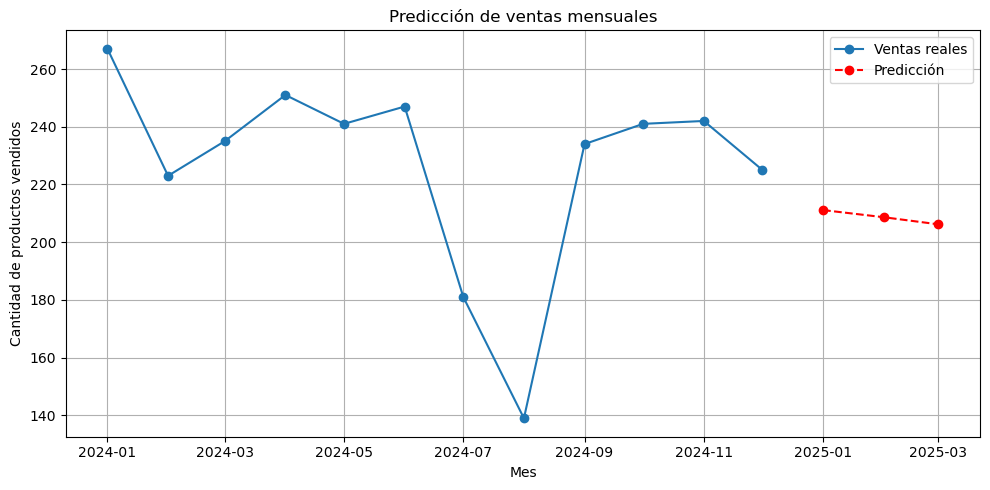

In [11]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['month'],y,marker='o',label='Ventas reales')
plt.plot(
    pd.date_range(start=monthly_sales['month'].iloc[-1]+pd.offsets.MonthBegin(),periods=3,freq='MS'),
    future_preds,
    marker='o', linestyle='--',color='red',label='Predicción')
plt.title('Predicción de ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Cantidad de productos vendidos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Se grafica la serie histórica de ventas
- Se superponen las predicciones para los 3 meses siguientes
- Se usan líneas continuas para datos reales y líneas punteadas para predicciones

In [15]:
future_results=pd.DataFrame({
        'Mes':pd.date_range(start=monthly_sales['month'].iloc[-1]+pd.offsets.MonthBegin(),periods=3,freq='MS'),
        'Ventas_previstas': future_preds.ravel()
})
future_results

,Mes,Ventas_previstas
0,2025-01-01,211.121212
1,2025-02-01,208.652681
2,2025-03-01,206.184149
